In [1]:
!pip install hstrader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.5 MB/s eta 0:00:00


In [2]:
from hstrader import HsTrader
from hstrader.models import Event, Tick, Order, CrtOrder, OrderType, SideType, Status, Position, Resolution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import os

In [10]:
CLIENT_ID = "Your Client ID"
CLIENT_SECRET = "Your Client Secret"


client = HsTrader(CLIENT_ID, CLIENT_SECRET)

In [41]:
# HsTrader symbol
symbol = client.get_symbol("USDJPY")
# HsTrader market data
data = client.get_market_history(symbol, resolution=Resolution.D1,count_back = 1000)

In [46]:

df = pd.DataFrame([historytick.dict() for historytick in data])
print(df)

                         time      open      high       low     close  \
0   2024-03-04 23:59:00+00:00  150.2834  150.5675  150.1905  150.4535   
1   2024-03-05 00:00:00+00:00  150.4535  150.5445  149.7035  150.0505   
2   2024-03-06 00:00:00+00:00  150.0505  150.0855  149.0934  149.2645   
3   2024-03-07 00:00:00+00:00  149.2645  149.2645  147.5884  147.8635   
4   2024-03-08 00:00:00+00:00  147.8635  148.1155  146.4835  147.0414   
..                        ...       ...       ...       ...       ...   
121 2024-07-24 00:00:00+00:00  155.7565  155.9895  153.1004  153.9264   
122 2024-07-25 00:00:00+00:00  153.9264  154.3144  151.9405  153.7025   
123 2024-07-26 00:00:00+00:00  153.7025  154.7374  153.0944  153.7484   
124 2024-07-27 00:00:00+00:00  153.7484  154.2115  153.5934  154.1414   
125 2024-07-29 00:00:00+00:00  154.1414  154.3535  153.0305  153.7714   

           volume  
0    2.173885e+06  
1    3.945232e+06  
2    4.089096e+06  
3    4.413548e+06  
4    4.276682e+06  
.. 

In [47]:
df['time'] = pd.to_datetime(df['time']).dt.date
df.head()

,time,open,high,low,close,volume
0,2024-03-04,150.2834,150.5675,150.1905,150.4535,2.173885e+06
1,2024-03-05,150.4535,150.5445,149.7035,150.0505,3.945232e+06
2,2024-03-06,150.0505,150.0855,149.0934,149.2645,4.089096e+06
3,2024-03-07,149.2645,149.2645,147.5884,147.8635,4.413548e+06
4,2024-03-08,147.8635,148.1155,146.4835,147.0414,4.276682e+06


In [48]:
def calculate_moving_average(data, window_size):
    """
    Calculate the moving average for the 'close' column of the dataset.

    :param data: pd.DataFrame, dataset containing 'time', 'open', 'high', 'low', 'close', 'volume' columns
    :param window_size: int, the window size for the moving average
    :return: pd.DataFrame, original dataset with an additional 'moving_average' column
    """
    data['moving_average'] = data['close'].rolling(window=window_size).mean()
    data['moving_average o'] = data['open'].rolling(window=window_size).mean()

    return data


result = calculate_moving_average(df, 7)
print(result)

           time      open      high       low     close        volume  \
0    2024-03-04  150.2834  150.5675  150.1905  150.4535  2.173885e+06   
1    2024-03-05  150.4535  150.5445  149.7035  150.0505  3.945232e+06   
2    2024-03-06  150.0505  150.0855  149.0934  149.2645  4.089096e+06   
3    2024-03-07  149.2645  149.2645  147.5884  147.8635  4.413548e+06   
4    2024-03-08  147.8635  148.1155  146.4835  147.0414  4.276682e+06   
..          ...       ...       ...       ...       ...           ...   
121  2024-07-24  155.7565  155.9895  153.1004  153.9264  6.254910e+06   
122  2024-07-25  153.9264  154.3144  151.9405  153.7025  6.230757e+06   
123  2024-07-26  153.7025  154.7374  153.0944  153.7484  5.558556e+06   
124  2024-07-27  153.7484  154.2115  153.5934  154.1414  5.983066e+05   
125  2024-07-29  154.1414  154.3535  153.0305  153.7714  2.298100e+06   

     moving_average  moving_average o  
0               NaN               NaN  
1               NaN               NaN  
2  

In [49]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Candlestick(
    x=df['time'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='Candlestick'
))

fig.add_trace(go.Scatter(
    x=df['time'],
    y=df['moving_average'],
    mode='lines',
    line=dict(color='red', width=2),
    name='Moving Average'
))

fig.add_trace(go.Scatter(
    x=df['time'],
    y=df['moving_average o'],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Moving Average open'
))

fig.update_layout(
    title='Candlestick Chart with Moving Average',
    xaxis_title='Time',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    template='plotly_white'
)

fig.show()

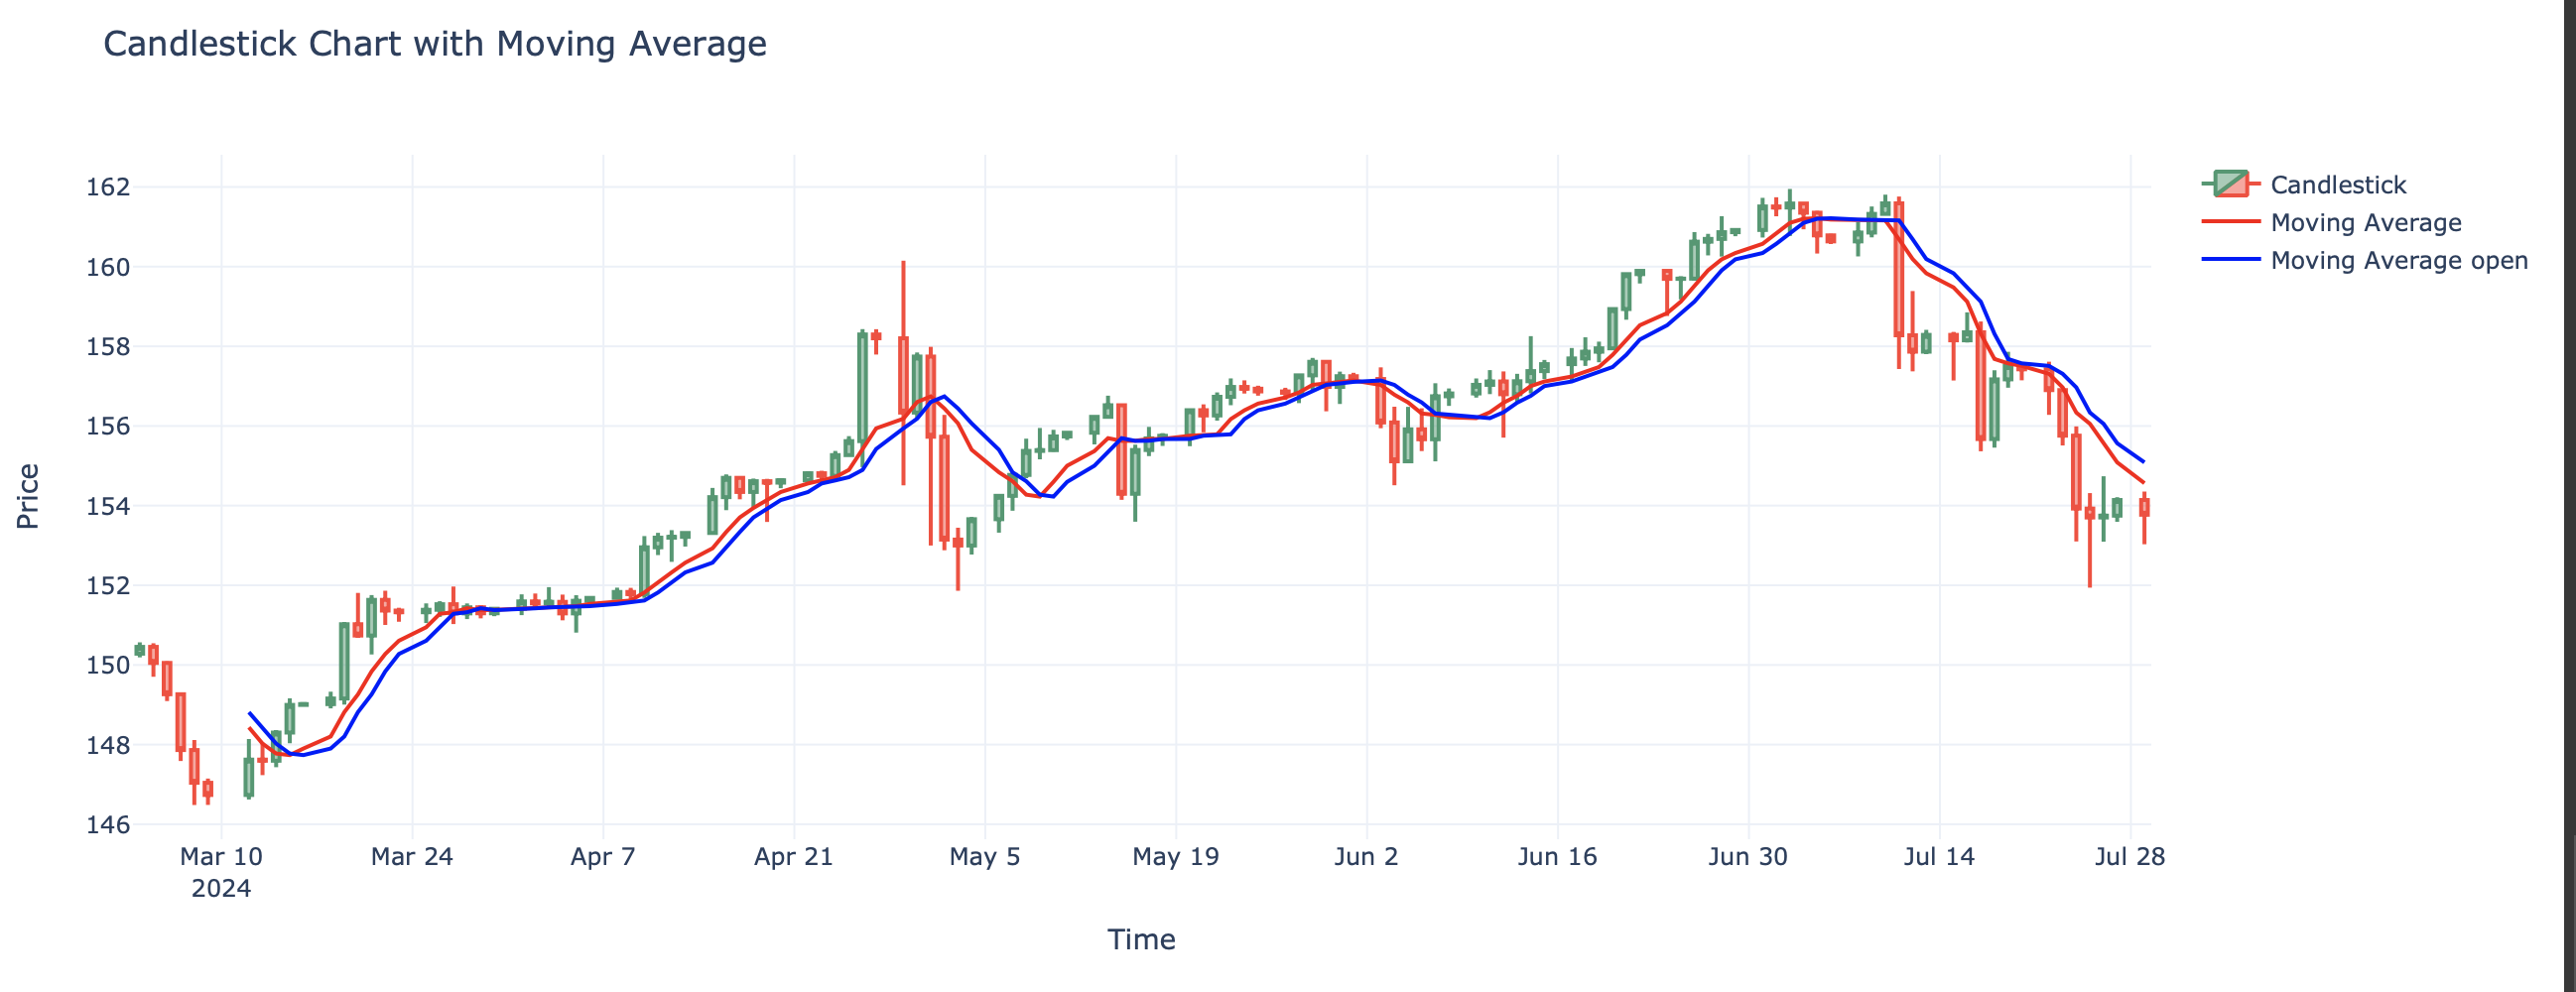

In [50]:
from IPython.display import Image
Image('VIS.png')